<a href="https://colab.research.google.com/github/BerkeleyExpertSystemTechnologiesLab/Squishy-Methane-Analysis/blob/veng%2Fmax-concentration-cluster/TDLAS_Concentration_Cluster_Maximizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread('test_scaled_img.png', cv2.IMREAD_GRAYSCALE)

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [ 8, 11, 12, ..., 10, 10, 10],
       [11, 10, 10, ..., 10, 10, 10],
       [10,  9, 10, ..., 10, 10, 10]], dtype=uint8)
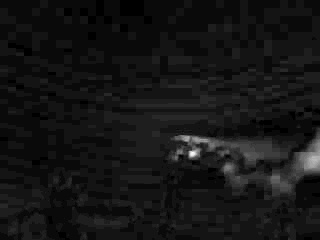

In [ ]:
img

In [ ]:
(min_val, max_val, min_loc, max_loc) = cv2.minMaxLoc(img)

In [ ]:
(min_val, max_val, min_loc, max_loc)

(0.0, 254.0, (96, 0), (192, 152))

array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[ 8,  8,  8],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[11, 11, 11],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)
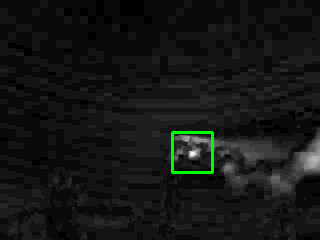

In [ ]:
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

radius = 20
# Define top-left and bottom-right points for the rectangle (box)
top_left = (max_loc[0] - radius, max_loc[1] - radius)  # 5 pixels offset for a 10x10 box
bottom_right = (max_loc[0] + radius, max_loc[1] + radius)

# Draw a red rectangle around the highest pixel
cv2.rectangle(img_color, top_left, bottom_right, (0, 255, 0), 2)

# Show the image with the box
# cv2.imshow('Image with max pixel box', img_color)


In [ ]:
img_normalized = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [ 8, 11, 12, ..., 10, 10, 10],
       [11, 10, 10, ..., 10, 10, 10],
       [10,  9, 10, ..., 10, 10, 10]], dtype=uint8)
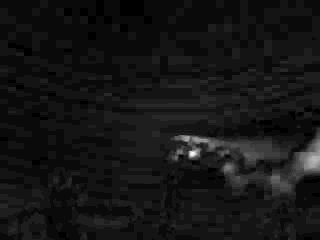

In [ ]:
img_normalized

In [ ]:
# Parameters: image, (kernel_width, kernel_height), sigmaX
blurred_img = cv2.GaussianBlur(img_normalized, (11, 11), 0)

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)
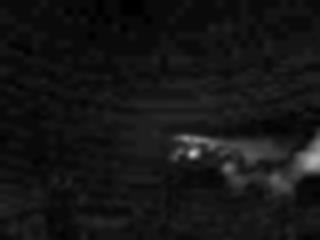

In [ ]:
blurred_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
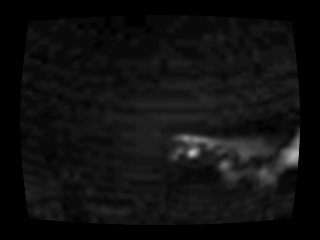

In [ ]:
height, width = blurred_img.shape[:2]

WARP = 0.5
K = np.array([[width*WARP, 0, width*WARP],
              [0, height*WARP, height*WARP],
              [0, 0, 1]], dtype=np.float64)

D = np.array([0.5, 0.5, 0, 0], dtype=np.float64) # Example distortion coefficients

# Optimal new camera matrix and distortion free map
map1, map2 = cv2.fisheye.initUndistortRectifyMap(
    K, D, np.eye(3), K, (width, height), cv2.CV_32FC1
)

# Apply the fisheye distortion
fisheye_img = cv2.remap(blurred_img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

fisheye_img

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)
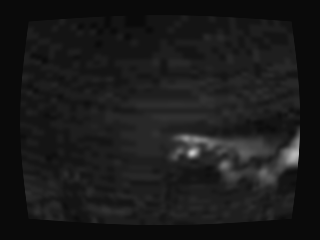

In [ ]:
import cv2
overexposed_img = cv2.add(fisheye_img, 10)
overexposed_img

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)
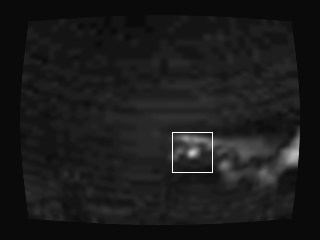

In [ ]:
(min_val, max_val, min_loc, max_loc) = cv2.minMaxLoc(overexposed_img)

radius = 20
# Define top-left and bottom-right points for the rectangle (box)
top_left = (max_loc[0] - radius, max_loc[1] - radius)
bottom_right = (max_loc[0] + radius, max_loc[1] + radius)

# Draw a red rectangle around the highest pixel
cv2.rectangle(overexposed_img, top_left, bottom_right, (255, 255, 255), 1)